### Week 6 Assignment
- Wiley Winters
- MSDS 670 &mdash; Data Visualization
- 25-FEB-2024

------------------------------------------------------------------------------------------
### Dataset Information
Dataset: <a href="https://www.kaggle.com/datasets/hummaamqaasim/jobs-in-data">Jobs and Salaries in Data Science</a>
Metadata:
- `work_year`: Year in which data was recorded.
- `job_title`: Specific title of the job role.
- `job_category`: Classification of the job role into broader categories for easier analysis
- `salary_currency`: Currency in which the salary is paid
- `salary`: Annual gross salary of the role in the local currency
- `salary_in_usd`: Annual gross salary in USD
- `employee_residence`: Country of residence
- `experience_level`: Classifies the professional experience level of the employee
- `employment_type`: Specifies the type of employment such as *full-time*, *part-time*, *contract*, *etc*
- `work_setting`: Work setting or environment such as *remote*, *in-person*, or *hybrid*
- `company_location`: Country where the company is located
- `company_size`: Size of the employer company categorized as *small (S)*, *medium (M)*, and *large (L)*

**Formal Reference to Dataset**

Qaasim, H. (2023, December). Jobs and Salaries in Data Science.</br> Version 6.
Retrieved December 25, 2023 from <a href="https://www.kaggle.com/datasets/hummaamqaasim/jobs-in-data/data">https://www.kaggle.com/datasets/hummaamqaasim/jobs-in-data/data</a>

------------------------------------------------------------------------
Import required packages and libraries.  Set global configuration items.

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick
from matplotlib import rcParams
import numpy as np

# Suppress Warnings
import warnings
warnings.filterwarnings('ignore')

# Set seaborn style and autoconfig
sns.set_style('whitegrid')
rcParams.update({'figure.autolayout': True})

Read dataset into a Pandas DataFrame

In [2]:
jobs_df = pd.read_csv('../data/jobs_in_data.csv')
jobs_df.sample(5)

,work_year,job_title,job_category,salary_currency,salary,salary_in_usd,employee_residence,experience_level,employment_type,work_setting,company_location,company_size
3193,2023,Data Engineer,Data Engineering,USD,105700,105700,United States,Senior,Full-time,In-person,United States,L
5850,2023,Data Scientist,Data Science and Research,USD,160000,160000,United States,Senior,Full-time,In-person,United States,M
1981,2023,Data Scientist,Data Science and Research,USD,185000,185000,United States,Senior,Full-time,In-person,United States,M
3966,2023,Data Scientist,Data Science and Research,USD,143250,143250,United States,Senior,Full-time,In-person,United States,M
8825,2022,Machine Learning Engineer,Machine Learning and AI,USD,164996,164996,United States,Senior,Full-time,In-person,United States,M


In [3]:
jobs_df.describe().T

,count,mean,std,min,25%,50%,75%,max
work_year,9355.0,2022.760449,0.519470,2020.0,2023.0,2023.0,2023.0,2023.0
salary,9355.0,149927.981293,63608.835387,14000.0,105200.0,143860.0,187000.0,450000.0
salary_in_usd,9355.0,150299.495564,63177.372024,15000.0,105700.0,143000.0,186723.0,450000.0


The dataset covers years from 2020 to 2023.  In order to not double count some values.  I will only work with 2023 data

Check some basic items to see if the dataset requires cleaning or not

In [4]:
print(jobs_df.info())
print('\nNaN Values:\n', jobs_df.isna().sum())
print('\nDuplicates: ', jobs_df.duplicated().sum())
print('\nSize: ', jobs_df.size)
print('\nDistribution:\n', jobs_df.describe().T)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9355 entries, 0 to 9354
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   work_year           9355 non-null   int64 
 1   job_title           9355 non-null   object
 2   job_category        9355 non-null   object
 3   salary_currency     9355 non-null   object
 4   salary              9355 non-null   int64 
 5   salary_in_usd       9355 non-null   int64 
 6   employee_residence  9355 non-null   object
 7   experience_level    9355 non-null   object
 8   employment_type     9355 non-null   object
 9   work_setting        9355 non-null   object
 10  company_location    9355 non-null   object
 11  company_size        9355 non-null   object
dtypes: int64(3), object(9)
memory usage: 877.2+ KB
None

NaN Values:
 work_year             0
job_title             0
job_category          0
salary_currency       0
salary                0
salary_in_usd         0
employ

Looks like there is a lot of duplicates.  I will remove them.

In [5]:
jobs_df.drop_duplicates(keep='first', inplace=True)
jobs_df.duplicated().sum()

0

-------------------------------------------------------------------------------
### Basic EDA

<Axes: xlabel='work_year', ylabel='count'>

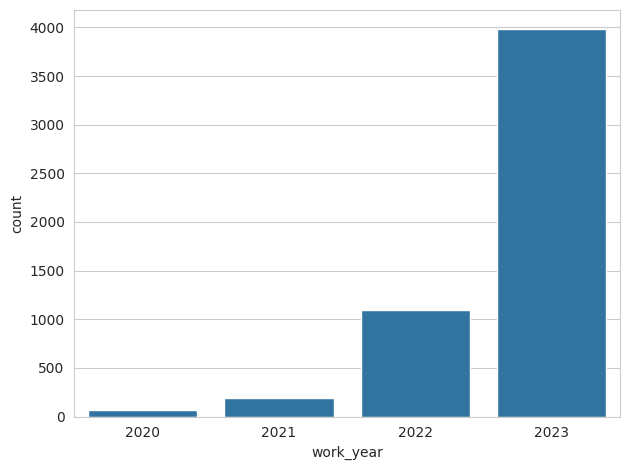

In [6]:
sns.countplot(jobs_df, x='work_year')

<Axes: xlabel='count', ylabel='job_category'>

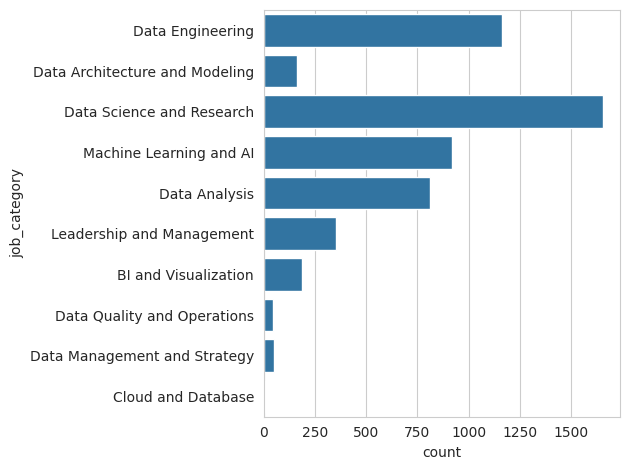

In [7]:
sns.countplot(jobs_df, y='job_category')

In [8]:
jobs_df['employee_residence'].value_counts().head(10)
#sns.countplot(data=jobs_df, y='employee_residence')

employee_residence
United States     4255
United Kingdom     351
Canada             196
Germany             65
Spain               63
France              53
Portugal            26
Netherlands         21
Italy               20
Brazil              19
Name: count, dtype: int64

<Axes: xlabel='experience_level', ylabel='count'>

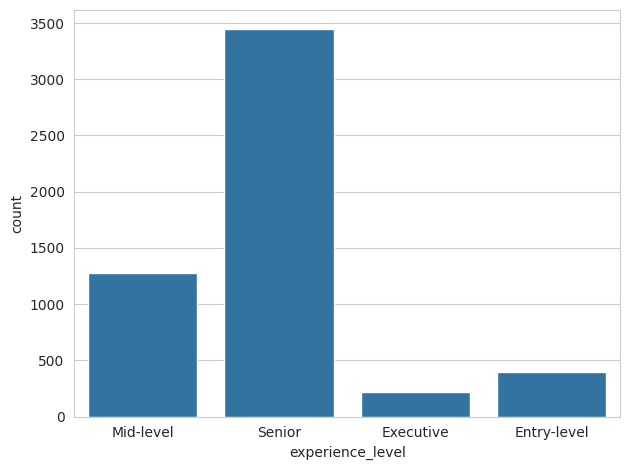

In [9]:
sns.countplot(data=jobs_df, x='experience_level')

In [10]:
jobs_df['experience_level'].value_counts()

experience_level
Senior         3444
Mid-level      1274
Entry-level     400
Executive       223
Name: count, dtype: int64

<Axes: xlabel='employment_type', ylabel='count'>

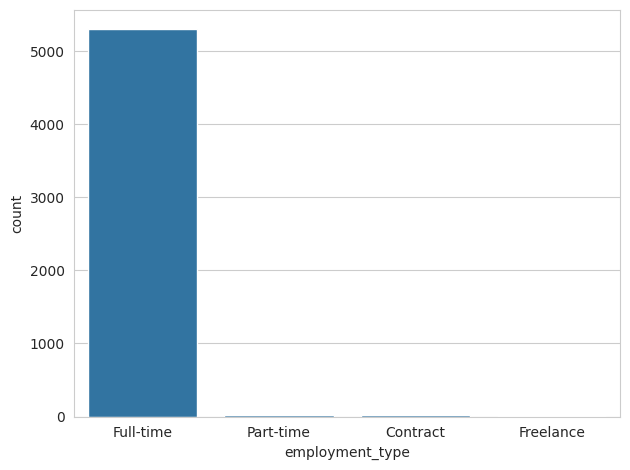

In [11]:
sns.countplot(data=jobs_df, x='employment_type')

In [12]:
jobs_df['employment_type'].value_counts()

employment_type
Full-time    5296
Contract       19
Part-time      15
Freelance      11
Name: count, dtype: int64

<Axes: xlabel='count', ylabel='company_location'>

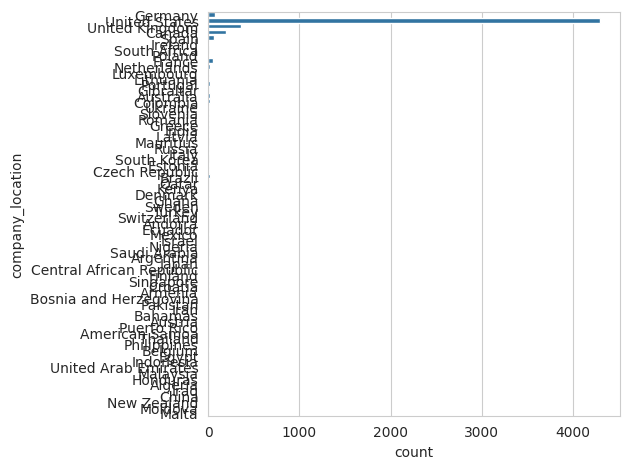

In [13]:
sns.countplot(data=jobs_df, y='company_location')

<Axes: xlabel='company_size', ylabel='count'>

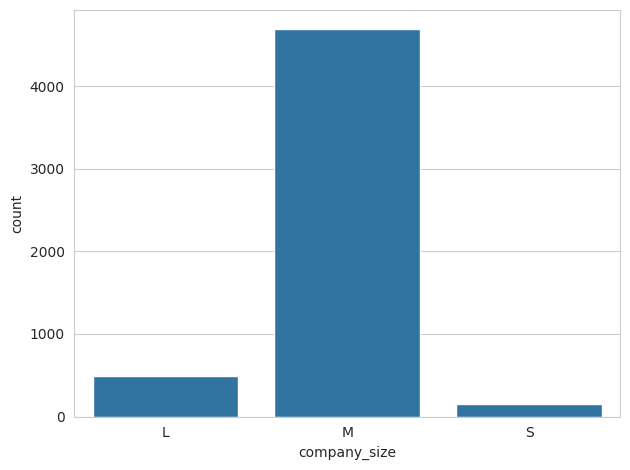

In [14]:
sns.countplot(data=jobs_df, x='company_size')

Based on EDA performed, I will limit the number of `company_location` and `employee_residence` to 10 countries.  I found that some of the countries are only listed a couple of time; therefore, are not well distributed.

In [15]:
jobs_df.value_counts(['company_location', 'employee_residence']).head(15)

company_location  employee_residence
United States     United States         4249
United Kingdom    United Kingdom         350
Canada            Canada                 192
Germany           Germany                 60
Spain             Spain                   57
France            France                  46
Portugal          Portugal                23
Netherlands       Netherlands             19
Brazil            Brazil                  17
Australia         Australia               17
Colombia          Colombia                14
Italy             Italy                   13
Greece            Greece                  11
Mexico            Mexico                   9
Ireland           Ireland                  8
Name: count, dtype: int64

In [16]:
countries = ['United States', 'United Kingdom', 'Canada', 'Germany',
             'Spain', 'France', 'Portugal', 'Netherlands', 'Australia',
             'Brazil', 'Colombia', 'Italy', 'Greece']
jobs_df = jobs_df[jobs_df['company_location'].isin(countries)]
jobs_df = jobs_df[jobs_df['employee_residence'].isin(countries)]
jobs_df.sample(10)

,work_year,job_title,job_category,salary_currency,salary,salary_in_usd,employee_residence,experience_level,employment_type,work_setting,company_location,company_size
781,2023,Research Scientist,Data Science and Research,USD,166000,166000,United States,Senior,Full-time,In-person,United States,M
5610,2023,Machine Learning Engineer,Machine Learning and AI,USD,170000,170000,United States,Mid-level,Full-time,Remote,United States,M
9337,2021,Data Analyst,Data Analysis,USD,75000,75000,United States,Mid-level,Full-time,In-person,United States,L
2271,2023,Data Science Lead,Data Science and Research,USD,142200,142200,United States,Senior,Full-time,In-person,United States,M
6350,2023,Data Analyst,Data Analysis,USD,121600,121600,United States,Senior,Full-time,Remote,United States,M
2254,2023,Data Engineer,Data Engineering,USD,134000,134000,United States,Senior,Full-time,Remote,United States,M
4261,2023,Data Engineer,Data Engineering,USD,198900,198900,United States,Mid-level,Full-time,In-person,United States,M
5633,2023,Machine Learning Engineer,Machine Learning and AI,USD,199000,199000,United States,Senior,Full-time,Remote,United States,M
6329,2023,Data Scientist,Data Science and Research,USD,239748,239748,United States,Senior,Full-time,In-person,United States,M
8086,2022,Data Manager,Leadership and Management,USD,45600,45600,United States,Entry-level,Full-time,Remote,United States,M


### Look for interesting items to plot

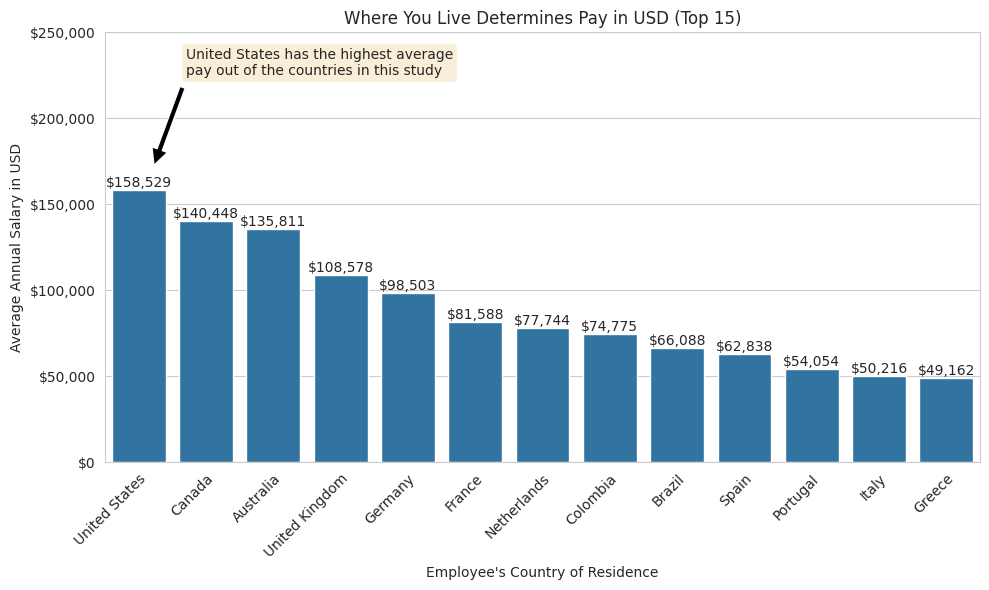

In [17]:
# Highest pay by employee_residence in USD. Top 10
pay_residence = jobs_df.groupby('employee_residence').agg({'salary_in_usd': 'mean'}). \
                               sort_values('salary_in_usd', ascending=False).head(15)
fig, ax = plt.subplots(figsize=(10,6))
props = dict(boxstyle='round', facecolor='wheat', alpha=0.5)
ax.yaxis.set_major_formatter(mtick.StrMethodFormatter('${x:,.0f}'))
ax.set(xlabel='Employee\'s Country of Residence', ylabel='Average Annual Salary in USD', \
       title='Where You Live Determines Pay in USD (Top 15)', ylim=(0,250000))
sns.barplot(data=pay_residence, x='employee_residence', y='salary_in_usd')
plt.xticks(rotation=45, ha='right', rotation_mode='anchor')
textstr = '\n'.join(('United States has the highest average',
                     'pay out of the countries in this study'))
ax.annotate(textstr, xy=(0.2,170000), xytext=(0.7,225000), bbox=props, 
            fontsize=10, arrowprops=dict(facecolor='black', shrink=0.05))
ax.bar_label(ax.containers[0], fmt='${:,.0f}')
fig.savefig('../images/highResidenceUSD.png', bbox_inches='tight', dpi=300)

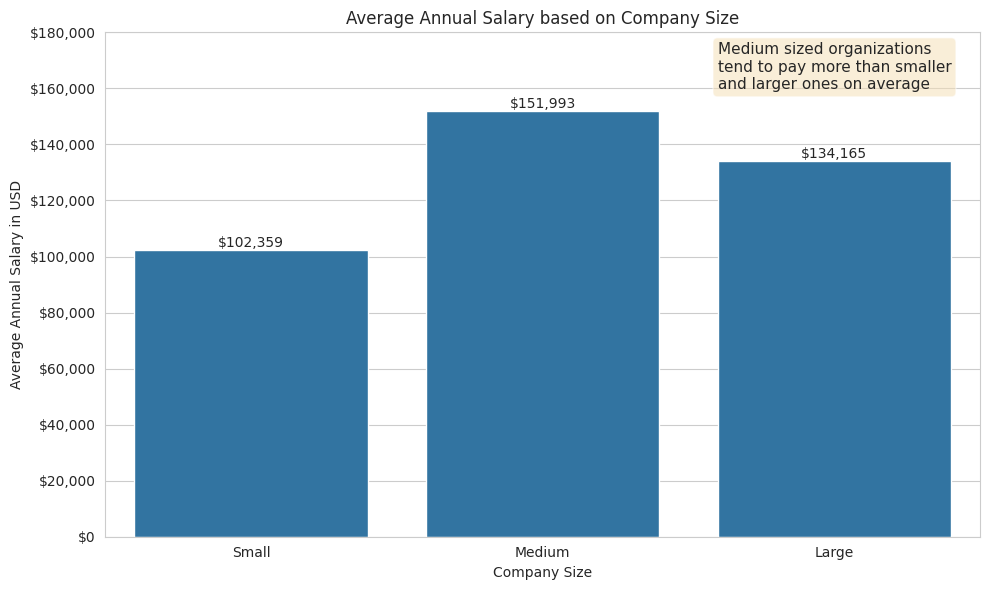

In [18]:
# Isolate study to USA
sizes = ('Small','Medium','Large')
size = jobs_df.groupby('company_size').agg({'salary_in_usd': 'mean'}). \
                        sort_values('company_size', ascending=False)
fig, ax = plt.subplots(figsize=(10,6))
sns.barplot(data=size, x='company_size', y='salary_in_usd')
ax.yaxis.set_major_formatter(mtick.StrMethodFormatter('${x:,.0f}'))
x_pos = np.arange(len(sizes))
ax.set_xticks(x_pos, labels=sizes)
ax.set(xlabel='Company Size', ylabel='Average Annual Salary in USD',
       title='Average Annual Salary based on Company Size',
       ylim=(0,180000))
textstr = '\n'.join(('Medium sized organizations',
                     'tend to pay more than smaller',
                     'and larger ones on average'))
props = dict(boxstyle='round', facecolor='wheat', alpha=0.5)
ax.text(0.7, 0.98, textstr, transform=ax.transAxes, fontsize=11,
        verticalalignment='top', bbox=props)
ax.bar_label(ax.containers[0], fmt='${:,.0f}')
fig.savefig('../images/aveCompanySize.png', bbox_inches='tight', dpi=300)

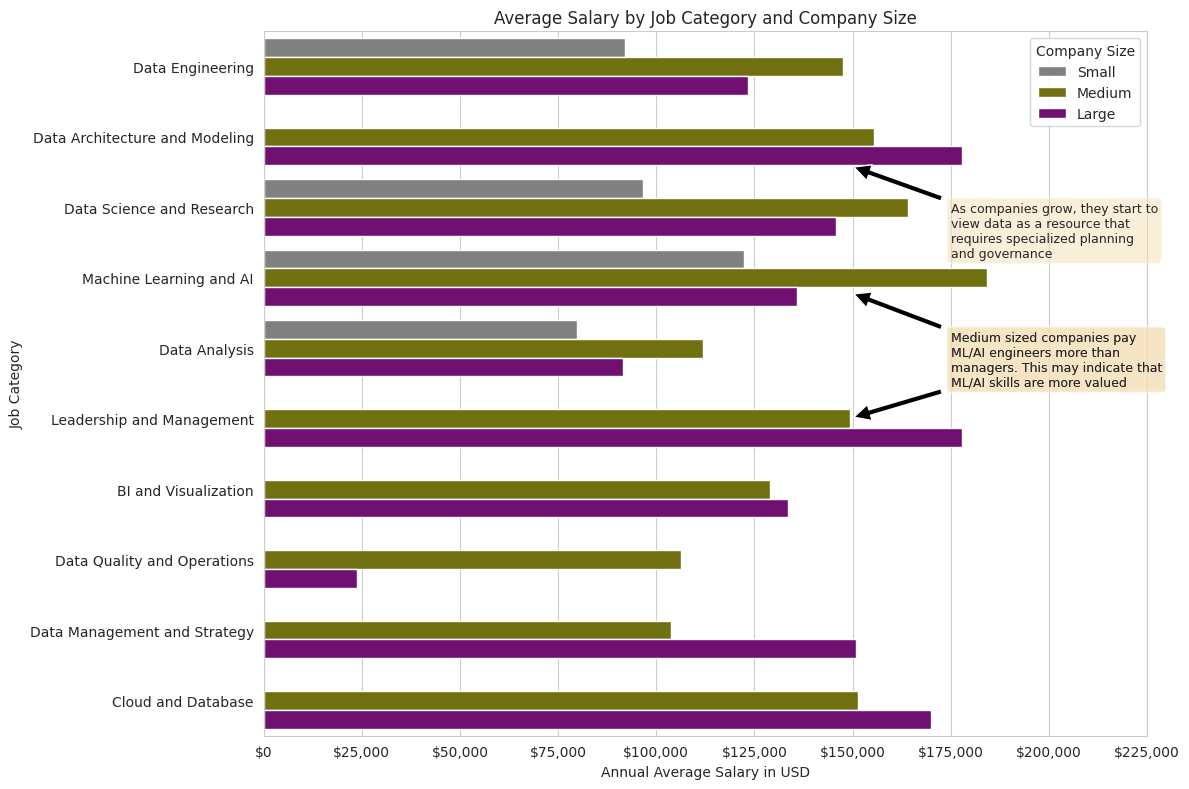

In [19]:
fig, ax = plt.subplots(figsize=(12,8))
ax.xaxis.set_major_formatter(mtick.StrMethodFormatter('${x:,.0f}'))
ax.set(xlabel='Annual Average Salary in USD', ylabel='Job Category',
       title='Average Salary by Job Category and Company Size',
       xlim=(0,225000))
hue_order = ['S', 'M', 'L']
bar_colors = ['grey', 'olive', 'purple']
sns.barplot(data=jobs_df, x='salary_in_usd', y='job_category', hue='company_size',
            hue_order=hue_order, palette=bar_colors, ci=None)
ax.legend(['Small','Medium', 'Large'], title='Company Size')
props = dict(boxstyle='round', facecolor='wheat', alpha=0.5)
text1 = '\n'.join(('As companies grow, they start to',
                   'view data as a resource that',
                   'requires specialized planning',
                   'and governance'))
text2 = '\n'.join(('Large companies pay well for',
                   'leadership, management, and',
                   'strategy.  Indicating this is a',
                   'priority for them.'))
text3 = '\n'.join(('Medium sized companies pay', 
                   'ML/AI engineers more than',
                   'managers. This may indicate that',
                   'ML/AI skills are more valued'))
an1 = ax.annotate(text1, xytext=(175000,2.70), xy=(149000,1.4), bbox=props,
                  fontsize=9, arrowprops=dict(facecolor='black', shrink=0.05))
an2 = ax.annotate(text3, xytext=(175000,4.53), xy=(149000,3.2), bbox=props,
                  fontsize=9, arrowprops=dict(facecolor='black', shrink=0.05))
an3 = ax.annotate(text3, xytext=(175000,4.53), xy=(149000,5.0), bbox=props,
                  fontsize=9, arrowprops=dict(facecolor='black', shrink=0.05))
fig.savefig('../images/aveCatSize.png', bbox_inches='tight', dpi=300)

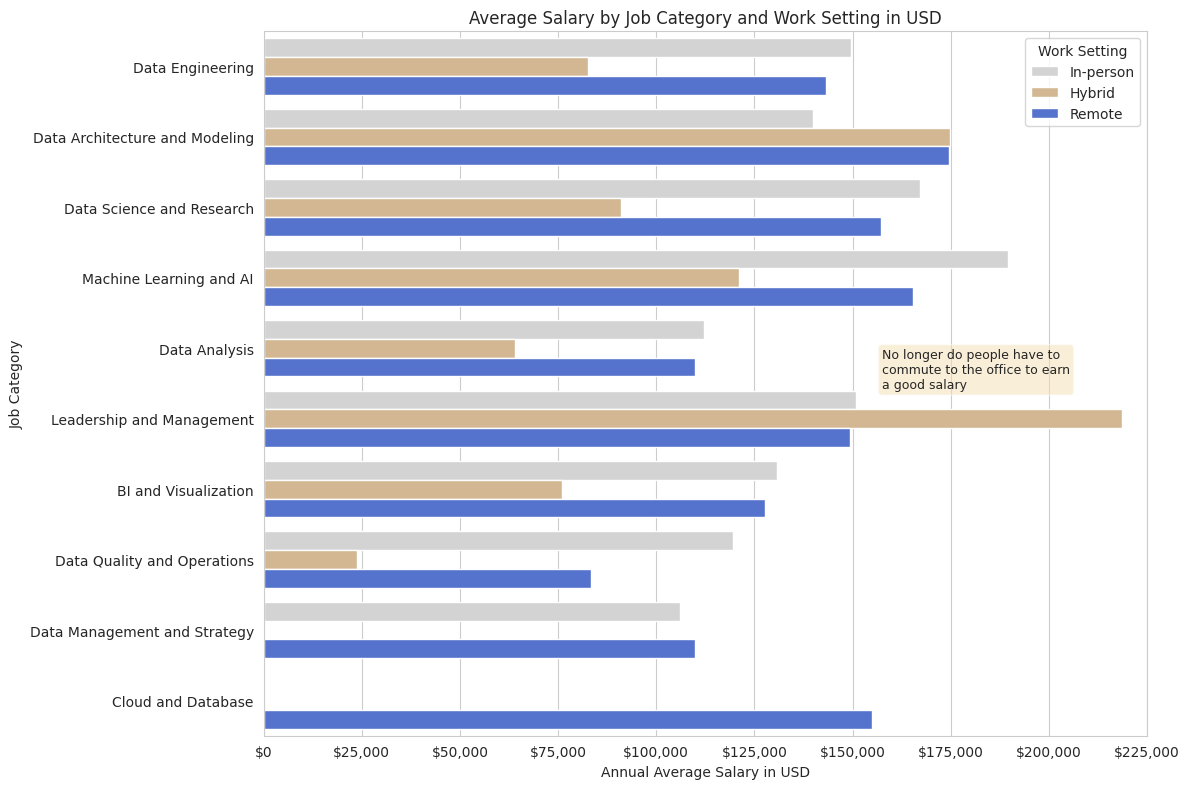

In [20]:
# Average Salary by employee type
fig, ax = plt.subplots(figsize=(12,8))
ax.xaxis.set_major_formatter(mtick.StrMethodFormatter('${x:,.0f}'))
ax.set(xlabel='Annual Average Salary in USD', ylabel='Job Category',
       title='Average Salary by Job Category and Work Setting in USD', xlim=(0,225000))
#hue_order = ['Remote', 'Hybrid', 'In-person']
hue_order = ['In-person', 'Hybrid', 'Remote']
bar_colors = ['lightgrey', 'burlywood', 'royalblue']
props = dict(boxstyle='round', facecolor='wheat', alpha=0.5)
sns.barplot(data=jobs_df, x='salary_in_usd', y='job_category', hue='work_setting', 
            hue_order=hue_order, palette=bar_colors, ci=None)
ax.legend(title='Work Setting')
text1 = '\n'.join(('No longer do people have to',
                   'commute to the office to earn',
                   'a good salary'))
ax.text(0.7, 0.55, text1, transform=ax.transAxes, fontsize=9,
        verticalalignment='top', bbox=props)
fig.savefig('../images/aveCatWork.png', bbox_inches='tight', dpi=300)